### This notebook was created to include the results of Final Project in EES5506 - CLIMATE CHANGE OBSERVATION AND MODELLING course. Its main purpose is to visualize the datasets used in the energy model

> #### AIM:
> ##### Investigate the factors that affect the temperature of solar panels in a scenario where we install solar panels over the entire land fraction of the globe.

> #### OBJECTIVES:
>- ##### Look into future scenarios for the components of the energy balance developed for the surface temperature of solar panels
>- ##### Determine the panel temperature from the energy balance model assuming that the system is at steady state since the data are monthly data.
>- ##### Interpret which factor would affect negatively and positively the panel temperature.

> #### IMPORTANCE:
> ##### The solar photovoltaics efficiency is inversely correlated with the panel temperature. This means that when the efficiency would be enhanced in the case where the panel is minimized. Therefore, it is important to identify how this temperature would change in the future based on simulations of radiations and the weather. Accordingly, in the case where the panel temperature would increase in the future elucidates that the efficiency of solar panels would be reduced in the future years. This is really important for future designers, engineers, and scientists to identify ways for the panels to be cooled or to plan ahead where are the best places that solar energy should be directed to so that its efficiency would be intact as much as possible. 

> #### METHODS:
> ##### The analysis was conducted using 3-D datasets from future scanerios experiments that are all in the form of netCDF (.nc) files downloaded from google drive including:
>- ##### Evaporation (kg/m2 s)2)
>- ##### Surface Downwelling Longwave Radiation (W/m2)
>- ###### Surface Upwelling Longwave Radiation (W/m2)
>- ##### Surface Downwelling Shortwave Radiation (W/m
>- #####  Surface Upwelling Shortwave Radiation (W/m2)
>- ##### Near-Surface Wind Speed (m/s)
>- ##### Near-Surface Air Temperature
>- ##### Surface Temperature (K) ## 

 #### Portions of this notebook are inspired from jupyter notebooks created previously by Dreadling.

  
__Author__: Caroline Merheb. For more information please contact me at caroline.merheb@temple.edu////

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime

In [40]:
import math
import cmocean 
import cartopy.crs as ccrs

In [3]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

#### The CMIP6 data available on Google Cloud was screened to search for the datasets in the energy balance through searching through the :
* #### __variable_id__: The name of the climate variables the models output. Please see the table [here](https://docs.google.com/spreadsheets/d/1UUtoz6Ofyjlpx5LdqhKcwHFz2SGoTQV2_yekHyMfL9Y/edit#gid=1221485271) for all the possible variable names.

### I will start with reading the future climate data from google drive:

In [4]:
# this only needs to be created once per Jupyter session
gcs = gcsfs.GCSFileSystem(token='anon')

In [5]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

#### __Evaporation__

In [6]:
# Evaporation under ssp119
evaporation_ssp119_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp119' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_evaporation_ssp119 = evaporation_ssp119_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_evaporation_ssp119 = gcs.get_mapper(zstore_evaporation_ssp119)
# open the dataset using xarray and zarr
evaporation_ssp119 = xr.open_zarr(mapper_evaporation_ssp119, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Evaporation under ssp245
evaporation_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp370' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_evaporation_ssp245 = evaporation_ssp245_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_evaporation_ssp245 = gcs.get_mapper(zstore_evaporation_ssp245)
# open the dataset using xarray and zarr
evaporation_ssp245 = xr.open_zarr(mapper_evaporation_ssp245, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})


# Evaporation under ssp585
evaporation_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_evaporation_ssp585 = evaporation_ssp585_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_evaporation_ssp585 = gcs.get_mapper(zstore_evaporation_ssp585)
# open the dataset using xarray and zarr
evaporation_ssp585 = xr.open_zarr(mapper_evaporation_ssp585, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})


#### __Shortwave Radiation__

In [7]:
# Downward Shortwave Radiation under ssp119
downshort_ssp119_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'rsds' & \
    experiment_id == 'ssp119' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_downshort_ssp119 = downshort_ssp119_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_downshort_ssp119 = gcs.get_mapper(zstore_downshort_ssp119)
# open the dataset using xarray and zarr
downshort_ssp119 = xr.open_zarr(mapper_downshort_ssp119, 
                                consolidated=True,use_cftime=True).rsds.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Downward Shortwave Radiation under ssp245
downshort_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'rsds' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_downshort_ssp245 = downshort_ssp245_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_downshort_ssp245 = gcs.get_mapper(zstore_downshort_ssp245)
# open the dataset using xarray and zarr
downshort_ssp245 = xr.open_zarr(mapper_downshort_ssp245, 
                                consolidated=True,use_cftime=True).rsds.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Downward Shortwave Radiation under ssp585
downshort_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'rsds' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_downshort_ssp585 = downshort_ssp585_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_downshort_ssp585 = gcs.get_mapper(zstore_downshort_ssp585)
# open the dataset using xarray and zarr
downshort_ssp585 = xr.open_zarr(mapper_downshort_ssp585, 
                                consolidated=True,use_cftime=True).rsds.rename({'lat':'latitude',
                                                             'lon':'longitude'})


In [8]:
# Upward Shortwave Radiation under ssp119
upshort_ssp119_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'rsus' & \
    experiment_id == 'ssp119' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_upshort_ssp119 = upshort_ssp119_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_upshort_ssp119 = gcs.get_mapper(zstore_upshort_ssp119)
# open the dataset using xarray and zarr
upshort_ssp119 = xr.open_zarr(mapper_upshort_ssp119, 
                                consolidated=True,use_cftime=True).rsus.rename({'lat':'latitude',
                                                             'lon':'longitude'})
# Upward Shortwave Radiation under ssp245
upshort_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'rsus' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_upshort_ssp245 = upshort_ssp245_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_upshort_ssp245 = gcs.get_mapper(zstore_upshort_ssp245)
# open the dataset using xarray and zarr
upshort_ssp245 = xr.open_zarr(mapper_upshort_ssp245, 
                                consolidated=True,use_cftime=True).rsus.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Upward Shortwave Radiation under ssp585
upshort_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'rsus' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_upshort_ssp585 = upshort_ssp585_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_upshort_ssp585 = gcs.get_mapper(zstore_upshort_ssp585)
# open the dataset using xarray and zarr
upshort_ssp585 = xr.open_zarr(mapper_upshort_ssp585, 
                                consolidated=True,use_cftime=True).rsus.rename({'lat':'latitude',
                                                             'lon':'longitude'})


#### __Longwave Radiation__

In [9]:
# Downward Longwave Radiation under ssp119
downlong_ssp119_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'rlds' & \
    experiment_id == 'ssp119' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_downlong_ssp119 = downlong_ssp119_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_downlong_ssp119 = gcs.get_mapper(zstore_downlong_ssp119)
# open the dataset using xarray and zarr
downlong_ssp119 = xr.open_zarr(mapper_downlong_ssp119, 
                                consolidated=True,use_cftime=True).rlds.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Downward Longwave Radiation under ssp245
downlong_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'rlds' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_downlong_ssp245 = downlong_ssp245_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_downlong_ssp245 = gcs.get_mapper(zstore_downlong_ssp245)
# open the dataset using xarray and zarr
downlong_ssp245 = xr.open_zarr(mapper_downlong_ssp245, 
                                consolidated=True,use_cftime=True).rlds.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Downward Longwave Radiation under ssp585
downlong_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'rlds' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_downlong_ssp585 = downlong_ssp585_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_downlong_ssp585 = gcs.get_mapper(zstore_downlong_ssp585)
# open the dataset using xarray and zarr
downlong_ssp585 = xr.open_zarr(mapper_downlong_ssp585, 
                                consolidated=True,use_cftime=True).rlds.rename({'lat':'latitude',
                                                             'lon':'longitude'})


In [10]:
# Upward Longwave Radiation under ssp119
uplong_ssp119_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'rlus' & \
    experiment_id == 'ssp119' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_uplong_ssp119 = uplong_ssp119_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_uplong_ssp119 = gcs.get_mapper(zstore_uplong_ssp119)
# open the dataset using xarray and zarr
uplong_ssp119 = xr.open_zarr(mapper_uplong_ssp119, 
                                consolidated=True,use_cftime=True).rlus.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Upward Longwave Radiation under ssp245
uplong_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'rlus' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_uplong_ssp245 = uplong_ssp245_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_uplong_ssp245 = gcs.get_mapper(zstore_uplong_ssp245)
# open the dataset using xarray and zarr
uplong_ssp245 = xr.open_zarr(mapper_uplong_ssp245, 
                                consolidated=True,use_cftime=True).rlus.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Upward Longwave Radiation under ssp585
uplong_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'rlus' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_uplong_ssp585 = uplong_ssp585_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_uplong_ssp585 = gcs.get_mapper(zstore_uplong_ssp585)
# open the dataset using xarray and zarr
uplong_ssp585 = xr.open_zarr(mapper_uplong_ssp585, 
                                consolidated=True,use_cftime=True).rlus.rename({'lat':'latitude',
                                                             'lon':'longitude'})


#### __Sensible Heat__

In [11]:
# Sensible Heat under ssp119
sensible_ssp119_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'hfss' & \
    experiment_id == 'ssp119' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_sensible_ssp119 = sensible_ssp119_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_sensible_ssp119 = gcs.get_mapper(zstore_sensible_ssp119)
# open the dataset using xarray and zarr
sensible_ssp119 = xr.open_zarr(mapper_sensible_ssp119, 
                                consolidated=True,use_cftime=True).hfss.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Sensible Heat under ssp245
sensible_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'hfss' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_sensible_ssp245 = sensible_ssp245_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_sensible_ssp245 = gcs.get_mapper(zstore_sensible_ssp245)
# open the dataset using xarray and zarr
sensible_ssp245 = xr.open_zarr(mapper_sensible_ssp245, 
                                consolidated=True,use_cftime=True).hfss.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Sensible Heat under ssp585
sensible_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'hfss' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_sensible_ssp585 = sensible_ssp585_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_sensible_ssp585 = gcs.get_mapper(zstore_sensible_ssp585)
# open the dataset using xarray and zarr
sensible_ssp585 = xr.open_zarr(mapper_sensible_ssp585, 
                                consolidated=True,use_cftime=True).hfss.rename({'lat':'latitude',
                                                             'lon':'longitude'})

#### __Surface Temperature__

In [12]:
# Surface Temperature under ssp119
surftemp_ssp119_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'ts' & \
    experiment_id == 'ssp119' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_surftemp_ssp119 = surftemp_ssp119_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_surftemp_ssp119 = gcs.get_mapper(zstore_surftemp_ssp119)
# open the dataset using xarray and zarr
surftemp_ssp119 = xr.open_zarr(mapper_surftemp_ssp119, 
                                consolidated=True,use_cftime=True).ts.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Surface Temperature under ssp245
surftemp_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'ts' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_surftemp_ssp245 = surftemp_ssp245_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_surftemp_ssp245 = gcs.get_mapper(zstore_surftemp_ssp245)
# open the dataset using xarray and zarr
surftemp_ssp245 = xr.open_zarr(mapper_surftemp_ssp245, 
                                consolidated=True,use_cftime=True).ts.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Surface Temperature under ssp585
surftemp_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'ts' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_surftemp_ssp585 = surftemp_ssp585_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_surftemp_ssp585 = gcs.get_mapper(zstore_surftemp_ssp585)
# open the dataset using xarray and zarr
surftemp_ssp585 = xr.open_zarr(mapper_surftemp_ssp585, 
                                consolidated=True,use_cftime=True).ts.rename({'lat':'latitude',
                                                             'lon':'longitude'})


#### __Microclimate__

In [13]:
# Air Temperature under ssp119
airtemp_ssp119_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp119' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_airtemp_ssp119 = airtemp_ssp119_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_airtemp_ssp119 = gcs.get_mapper(zstore_airtemp_ssp119)
# open the dataset using xarray and zarr
airtemp_ssp119 = xr.open_zarr(mapper_airtemp_ssp119, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Air Temperature under ssp245
airtemp_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_airtemp_ssp245 = airtemp_ssp245_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_airtemp_ssp245 = gcs.get_mapper(zstore_airtemp_ssp245)
# open the dataset using xarray and zarr
airtemp_ssp245 = xr.open_zarr(mapper_airtemp_ssp245, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Air Temperature under ssp585
airtemp_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_airtemp_ssp585 = airtemp_ssp585_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_airtemp_ssp585 = gcs.get_mapper(zstore_airtemp_ssp585)
# open the dataset using xarray and zarr
airtemp_ssp585 = xr.open_zarr(mapper_airtemp_ssp585, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})


In [14]:
# Wind Speed under ssp119
windspeed_ssp119_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'sfcWind' & \
    experiment_id == 'ssp119' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_windspeed_ssp119 = windspeed_ssp119_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_windspeed_ssp119 = gcs.get_mapper(zstore_windspeed_ssp119)
# open the dataset using xarray and zarr
windspeed_ssp119 = xr.open_zarr(mapper_windspeed_ssp119, 
                                consolidated=True,use_cftime=True).sfcWind.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Wind Speed under ssp245
windspeed_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'sfcWind' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_windspeed_ssp245 = windspeed_ssp245_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_windspeed_ssp245 = gcs.get_mapper(zstore_windspeed_ssp245)
# open the dataset using xarray and zarr
windspeed_ssp245 = xr.open_zarr(mapper_windspeed_ssp245, 
                                consolidated=True,use_cftime=True).sfcWind.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Wind Speed under ssp585
windspeed_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'sfcWind' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NASA-GISS' &  \
    source_id == 'GISS-E2-1-G' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p3f1'"
)

zstore_windspeed_ssp585 = windspeed_ssp585_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_windspeed_ssp585 = gcs.get_mapper(zstore_windspeed_ssp585)
# open the dataset using xarray and zarr
windspeed_ssp585 = xr.open_zarr(mapper_windspeed_ssp585, 
                                consolidated=True,use_cftime=True).sfcWind.rename({'lat':'latitude',
                                                             'lon':'longitude'})


#### __Sea Mask__

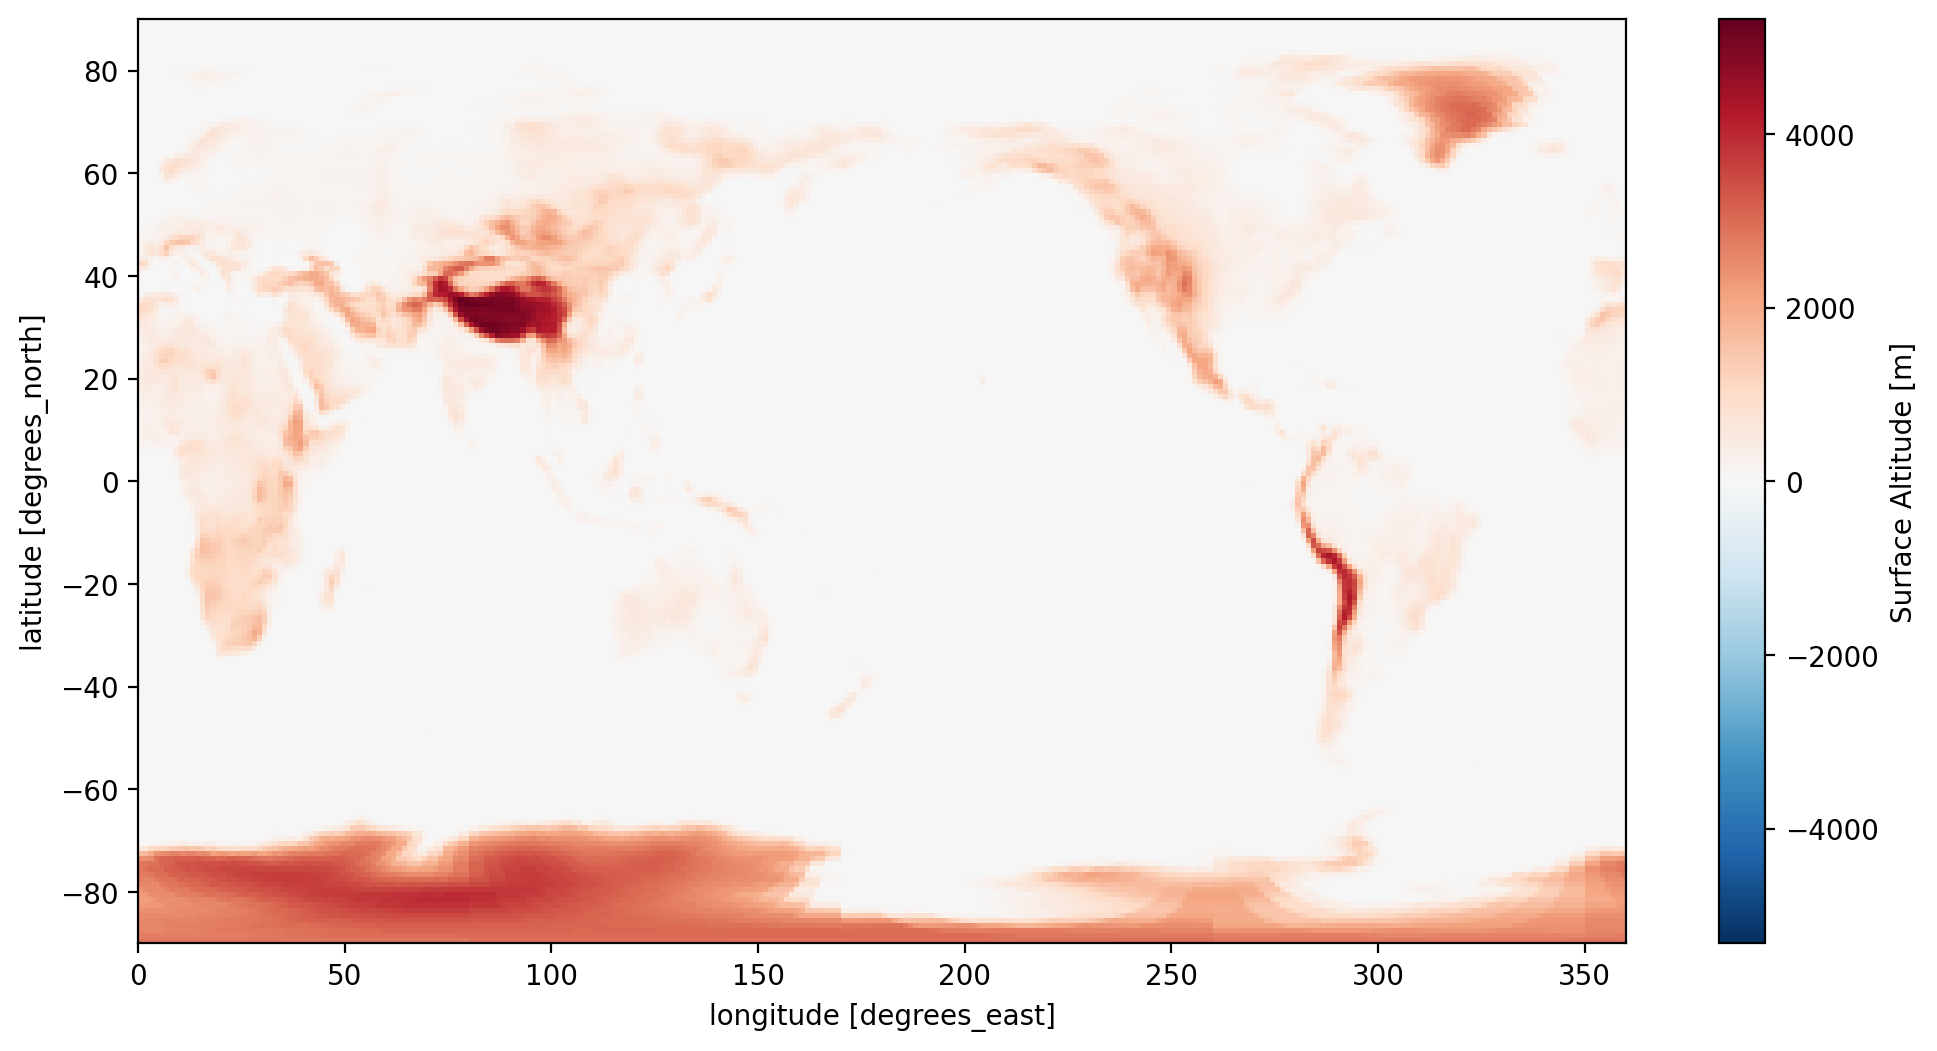

In [15]:
altitude_data = google_cloud_cmip6.query(
    "activity_id=='CMIP' & \
    table_id == 'fx' & \
    variable_id == 'orog' & \
    experiment_id == 'historical' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

zstore_altitude = altitude_data.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper_altitude = gcs.get_mapper(zstore_altitude)
# open the dataset using xarray and zarr
altitude = xr.open_zarr(mapper_altitude, 
                                consolidated=True,use_cftime=True).orog.rename({'lat':'latitude',
                                                             'lon':'longitude'})
altitude.plot()

In [16]:
# Use altitude layer to create the mask for the oceans
altitude_data = altitude.values
# Assign the condition that separates the land from the ocean (altitude = 0 for oceans)
binary_mask = np.where(altitude_data > 0, 1, 0)
# Re-create the dataset with new values for the mask 0 for ocean and 1 for land
land_sea_mask = xr.DataArray(binary_mask, 
                             coords=altitude.coords, 
                             dims=altitude.dims)

# Assign values for longitude and latitude dimensions for the high resolution of the mask 
# to coarsen it to have the same resolution as all the other climate data
latitude_lowres = windspeed_ssp585.latitude
longitude_lowres = windspeed_ssp585.longitude
latitude_highres = land_sea_mask.latitude
longitude_highres = land_sea_mask.longitude

land_sea_mask_adjusted = land_sea_mask.interp(latitude=windspeed_ssp585.latitude, 
                                              longitude=windspeed_ssp585.longitude, 
                                              method='nearest')

### Introduce variables to be used in the energy balance model

##### Constants

In [17]:
# Emissivity of the downward face of PV
e_PV_d = 0.95
# Emissivity of the upward face of PV
e_PV_u = 0.79
# Albedo of PV
alpha_PV = 0.11
# Efficiency of PV
mu_PV = 0.19
# Thermal conductivity of dry air
kair = 0.026 # Units W/mK
# Kinematic viscosity of air
v = 1.57e-5 # Units m2/s
# Prandtl number of air
Pr = 0.707
# length of PV
l = 2 # Units m
#angle tilt of PV
beta_deg = 30
beta = (30*math.pi)/180
# View Factor of PV
VF = (1+math.cos(beta))/2
# Stephen-Boltzmann constant
psi = 5.67e-8 # Units W/m2K4
# Enthalpy of vaporization of water
H = 2.26e6 # Units J/kg

##### Calculated from arrays

In [18]:
# Heat transfer coefficient of solid-air interface
hair_ssp119 = 0.036 * (kair/l) * (Pr**(1/3)) * (((windspeed_ssp119*l)/v)**(4/5))
hair_ssp245 = 0.036 * (kair/l) * (Pr**(1/3)) * (((windspeed_ssp245*l)/v)**(4/5))
hair_ssp585 = 0.036 * (kair/l) * (Pr**(1/3)) * (((windspeed_ssp585*l)/v)**(4/5))

# Emissivity of the Earth surface
e_surface_ssp119 = downlong_ssp119/(psi*(surftemp_ssp119**4))
e_surface_ssp245 = downlong_ssp245/(psi*(surftemp_ssp245**4))
e_surface_ssp585 = downlong_ssp585/(psi*(surftemp_ssp585**4))

# Emissivity exchange between PV backward panel surface and the ground surface
e_ex_ssp119 = (e_PV_d*e_surface_ssp119) / (e_surface_ssp119 + e_PV_d - (2*e_surface_ssp119*e_PV_d))
e_ex_ssp245 = (e_PV_d*e_surface_ssp245) / (e_surface_ssp245 + e_PV_d - (2*e_surface_ssp245*e_PV_d))
e_ex_ssp585 = (e_PV_d*e_surface_ssp585) / (e_surface_ssp585 + e_PV_d - (2*e_surface_ssp585*e_PV_d))

# Evapotranspiration
ET_ssp119 = evaporation_ssp119*H
ET_ssp245 = evaporation_ssp245*H
ET_ssp585 = evaporation_ssp585*H


### ENERGY BALANCE
__C_PV*(dT_PV/dt) =__
>- __+(1-alpha_PV) * SWsky_d__ _shortwave radiated and reflected on upper surface of PV_
>- __+e_PV_u * LWsky_d__ _longwave radiated and emitted back from upper PV panel_
>- __+(1-alpha_PV) * SWsky_u__ _shortwave radiated and reflected on upper surface of PV_
>- __+e_PV_d * LWsky_u__ _longwave radiated and emitted back from upper PV panel_
>- __-e_PV_u * psi * T_PV**4__ _energy emitted from PV from thermal radiation_
>- __-VF * e_ex * psi * (T_PV**4 - Tsurface**4)__ _energy exchange between downward face of PV and ground_
>- __-mu_PV * SWsky_d * {1-0.005(T_PV-298.15)}__ _energy from shortwave radiation absorbed by upper face of PV and converted to electricity_
>- __-mu_PV * SWsky_u * {1-0.005(T_PV-298.15)}__ _energy from shortwave radiation absorbed by downward face of PV and converted to electricity_
>- __-2 * hair * (T_PV-Tair)__ _latent heat from air-PV interaction due to convection from wind_
>- __-ET__ _latent heat from evapotranspiration from vegetation_

__C_PV*(dT_PV/dt) =0__ assuming that it is steady state

#### solving the energy balance will result in a quartic equation where T_PV is the unknown. The quartic equation is adjusted to the form: ax4 + bx3 + cx2 + dx + e = 0

In [23]:
a_ssp119 = - (e_PV_u*psi) - (VF*e_ex_ssp119*psi)
a_ssp245 = - (e_PV_u*psi) - (VF*e_ex_ssp245*psi)
a_ssp585 = - (e_PV_u*psi) - (VF*e_ex_ssp585*psi)

a_annual_ssp119 = ml.util.annual_average(a_ssp119, tcoord='time')
a_annual_ssp245 = ml.util.annual_average(a_ssp245, tcoord='time')
a_annual_ssp585 = ml.util.annual_average(a_ssp585, tcoord='time')

In [24]:
b = 0
c = 0

In [25]:
d_ssp119 = (0.005*mu_PV*(downshort_ssp119+upshort_ssp119))-(2*hair_ssp119)
d_ssp245 = (0.005*mu_PV*(downshort_ssp245+upshort_ssp245))-(2*hair_ssp245)
d_ssp585 = (0.005*mu_PV*(downshort_ssp585+upshort_ssp585))-(2*hair_ssp585)

d_annual_ssp119 = ml.util.annual_average(d_ssp119, tcoord='time')
d_annual_ssp245 = ml.util.annual_average(d_ssp245, tcoord='time')
d_annual_ssp585 = ml.util.annual_average(d_ssp585, tcoord='time')

In [26]:
e_ssp119 = ((1-alpha_PV-(2.5*mu_PV))*(downshort_ssp119+upshort_ssp119))+(
    e_PV_u*downlong_ssp119)+(e_PV_d*uplong_ssp119)+(
    VF*e_ex_ssp119*psi*(surftemp_ssp119**4))-(
    2*hair_ssp119*airtemp_ssp119)-ET_ssp119
e_ssp245 = ((1-alpha_PV-(2.5*mu_PV))*(downshort_ssp245+upshort_ssp245))+(
    e_PV_u*downlong_ssp245)+(e_PV_d*uplong_ssp245)+(
    VF*e_ex_ssp245*psi*(surftemp_ssp245**4))-(
    2*hair_ssp245*airtemp_ssp245)-ET_ssp245
e_ssp585 = ((1-alpha_PV-(2.5*mu_PV))*(downshort_ssp585+upshort_ssp585))+(
    e_PV_u*downlong_ssp585)+(e_PV_d*uplong_ssp585)+(
    VF*e_ex_ssp585*psi*(surftemp_ssp585**4))-(
    2*hair_ssp585*airtemp_ssp585)-ET_ssp585

e_annual_ssp119 = ml.util.annual_average(e_ssp119, tcoord='time')
e_annual_ssp245 = ml.util.annual_average(e_ssp245, tcoord='time')
e_annual_ssp585 = ml.util.annual_average(e_ssp585, tcoord='time')

#### SSP119

In [80]:
ET_annual_ssp119 = ml.util.annual_average(ET_ssp119, tcoord='time')
SWdown_annual_ssp119 = ml.util.annual_average(downshort_ssp119, tcoord='time')
SWup_annual_ssp119 = ml.util.annual_average(upshort_ssp119, tcoord='time')
LWdown_annual_ssp119 = ml.util.annual_average(downlong_ssp119, tcoord='time')
LWup_annual_ssp119 = ml.util.annual_average(uplong_ssp119, tcoord='time')
Tair_annual_ssp119 = ml.util.annual_average(airtemp_ssp119, tcoord='time')
WS_annual_ssp119 = ml.util.annual_average(windspeed_ssp119, tcoord='time')
Tsurface_annual_ssp119 = ml.util.annual_average(surftemp_ssp119, tcoord='time')

In [144]:
ET_annual_ssp119_2014_2025 = ET_annual_ssp119.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
ET_annual_ssp119_2080_2100 = ET_annual_ssp119.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
ET_annual_ssp119_difference_lastfirst10yrs = ET_annual_ssp119_2080_2100 - ET_annual_ssp119_2014_2025
ET_diff_ssp119 = ET_annual_ssp119_difference_lastfirst10yrs*land_sea_mask_adjusted

SWdown_annual_ssp119_2014_2025 = SWdown_annual_ssp119.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
SWdown_annual_ssp119_2080_2100 = SWdown_annual_ssp119.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
SWdown_annual_ssp119_difference_lastfirst10yrs = SWdown_annual_ssp119_2080_2100 - SWdown_annual_ssp119_2014_2025
SWdown_diff_ssp119 = SWdown_annual_ssp119_difference_lastfirst10yrs*land_sea_mask_adjusted

SWup_annual_ssp119_2014_2025 = SWup_annual_ssp119.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
SWup_annual_ssp119_2080_2100 = SWup_annual_ssp119.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
SWup_annual_ssp119_difference_lastfirst10yrs = SWup_annual_ssp119_2080_2100 - SWup_annual_ssp119_2014_2025
SWup_diff_ssp119 = SWup_annual_ssp119_difference_lastfirst10yrs*land_sea_mask_adjusted

LWdown_annual_ssp119_2014_2025 = LWdown_annual_ssp119.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
LWdown_annual_ssp119_2080_2100 = LWdown_annual_ssp119.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
LWdown_annual_ssp119_difference_lastfirst10yrs = LWdown_annual_ssp119_2080_2100 - LWdown_annual_ssp119_2014_2025
LWdown_diff_ssp119 = LWdown_annual_ssp119_difference_lastfirst10yrs*land_sea_mask_adjusted

LWup_annual_ssp119_2014_2025 = LWup_annual_ssp119.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
LWup_annual_ssp119_2080_2100 = LWup_annual_ssp119.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
LWup_annual_ssp119_difference_lastfirst10yrs = LWup_annual_ssp119_2080_2100 - LWup_annual_ssp119_2014_2025
LWup_diff_ssp119 = LWup_annual_ssp119_difference_lastfirst10yrs*land_sea_mask_adjusted

Tair_annual_ssp119_2014_2025 = Tair_annual_ssp119.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
Tair_annual_ssp119_2014_2025 = Tair_annual_ssp119_2014_2025 - 273.15
Tair_annual_ssp119_2080_2100 = Tair_annual_ssp119.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
Tair_annual_ssp119_2080_2100 = Tair_annual_ssp119_2080_2100 - 273.15
Tair_annual_ssp119_difference_lastfirst10yrs = Tair_annual_ssp119_2080_2100 - Tair_annual_ssp119_2014_2025
Tair_diff_ssp119 = Tair_annual_ssp119_difference_lastfirst10yrs*land_sea_mask_adjusted

WS_annual_ssp119_2014_2025 = WS_annual_ssp119.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
WS_annual_ssp119_2080_2100 = WS_annual_ssp119.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
WS_annual_ssp119_difference_lastfirst10yrs = WS_annual_ssp119_2080_2100 - WS_annual_ssp119_2014_2025
WS_diff_ssp119 = WS_annual_ssp119_difference_lastfirst10yrs*land_sea_mask_adjusted

Tsurface_annual_ssp119_2014_2025 = Tsurface_annual_ssp119.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
Tsurface_annual_ssp119_2014_2025 = Tsurface_annual_ssp119_2014_2025 - 273.15
Tsurface_annual_ssp119_2080_2100 = Tsurface_annual_ssp119.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
Tsurface_annual_ssp119_2080_2100 = Tsurface_annual_ssp119_2080_2100 - 273.15
Tsurface_annual_ssp119_difference_lastfirst10yrs = Tsurface_annual_ssp119_2080_2100 - Tsurface_annual_ssp119_2014_2025
Tsurface_diff_ssp119 = Tsurface_annual_ssp119_difference_lastfirst10yrs*land_sea_mask_adjusted


#### SSP245

In [86]:
ET_annual_ssp245 = ml.util.annual_average(ET_ssp245, tcoord='time')
SWdown_annual_ssp245 = ml.util.annual_average(downshort_ssp245, tcoord='time')
SWup_annual_ssp245 = ml.util.annual_average(upshort_ssp245, tcoord='time')
LWdown_annual_ssp245 = ml.util.annual_average(downlong_ssp245, tcoord='time')
LWup_annual_ssp245 = ml.util.annual_average(uplong_ssp245, tcoord='time')
Tair_annual_ssp245 = ml.util.annual_average(airtemp_ssp245, tcoord='time')
WS_annual_ssp245 = ml.util.annual_average(windspeed_ssp245, tcoord='time')
Tsurface_annual_ssp245 = ml.util.annual_average(surftemp_ssp245, tcoord='time')

In [87]:
ET_annual_ssp245_2014_2025 = ET_annual_ssp245.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
ET_annual_ssp245_2080_2100 = ET_annual_ssp245.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
ET_annual_ssp245_difference_lastfirst10yrs = ET_annual_ssp245_2080_2100 - ET_annual_ssp245_2014_2025
ET_diff_ssp245 = ET_annual_ssp245_difference_lastfirst10yrs*land_sea_mask_adjusted

SWdown_annual_ssp245_2014_2025 = SWdown_annual_ssp245.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
SWdown_annual_ssp245_2080_2100 = SWdown_annual_ssp245.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
SWdown_annual_ssp245_difference_lastfirst10yrs = SWdown_annual_ssp245_2080_2100 - SWdown_annual_ssp245_2014_2025
SWdown_diff_ssp245 = SWdown_annual_ssp245_difference_lastfirst10yrs*land_sea_mask_adjusted

SWup_annual_ssp245_2014_2025 = SWup_annual_ssp245.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
SWup_annual_ssp245_2080_2100 = SWup_annual_ssp245.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
SWup_annual_ssp245_difference_lastfirst10yrs = SWup_annual_ssp245_2080_2100 - SWup_annual_ssp245_2014_2025
SWup_diff_ssp245 = SWup_annual_ssp245_difference_lastfirst10yrs*land_sea_mask_adjusted

LWdown_annual_ssp245_2014_2025 = LWdown_annual_ssp245.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
LWdown_annual_ssp245_2080_2100 = LWdown_annual_ssp245.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
LWdown_annual_ssp245_difference_lastfirst10yrs = LWdown_annual_ssp245_2080_2100 - LWdown_annual_ssp245_2014_2025
LWdown_diff_ssp245 = LWdown_annual_ssp245_difference_lastfirst10yrs*land_sea_mask_adjusted

LWup_annual_ssp245_2014_2025 = LWup_annual_ssp245.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
LWup_annual_ssp245_2080_2100 = LWup_annual_ssp245.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
LWup_annual_ssp245_difference_lastfirst10yrs = LWup_annual_ssp245_2080_2100 - LWup_annual_ssp245_2014_2025
LWup_diff_ssp245 = LWup_annual_ssp245_difference_lastfirst10yrs*land_sea_mask_adjusted

Tair_annual_ssp245_2014_2025 = Tair_annual_ssp245.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
Tair_annual_ssp245_2080_2100 = Tair_annual_ssp245.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
Tair_annual_ssp245_difference_lastfirst10yrs = Tair_annual_ssp245_2080_2100 - Tair_annual_ssp245_2014_2025
Tair_diff_ssp245 = Tair_annual_ssp245_difference_lastfirst10yrs*land_sea_mask_adjusted

WS_annual_ssp245_2014_2025 = WS_annual_ssp245.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
WS_annual_ssp245_2080_2100 = WS_annual_ssp245.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
WS_annual_ssp245_difference_lastfirst10yrs = WS_annual_ssp245_2080_2100 - WS_annual_ssp245_2014_2025
WS_diff_ssp245 = WS_annual_ssp245_difference_lastfirst10yrs*land_sea_mask_adjusted

Tsurface_annual_ssp245_2014_2025 = Tsurface_annual_ssp245.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
Tsurface_annual_ssp245_2080_2100 = Tsurface_annual_ssp245.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
Tsurface_annual_ssp245_difference_lastfirst10yrs = Tsurface_annual_ssp245_2080_2100 - Tsurface_annual_ssp245_2014_2025
Tsurface_diff_ssp245 = Tsurface_annual_ssp245_difference_lastfirst10yrs*land_sea_mask_adjusted


#### SSP585

In [85]:
ET_annual_ssp585 = ml.util.annual_average(ET_ssp585, tcoord='time')
SWdown_annual_ssp585 = ml.util.annual_average(downshort_ssp585, tcoord='time')
SWup_annual_ssp585 = ml.util.annual_average(upshort_ssp585, tcoord='time')
LWdown_annual_ssp585 = ml.util.annual_average(downlong_ssp585, tcoord='time')
LWup_annual_ssp585 = ml.util.annual_average(uplong_ssp585, tcoord='time')
Tair_annual_ssp585 = ml.util.annual_average(airtemp_ssp585, tcoord='time')
WS_annual_ssp585 = ml.util.annual_average(windspeed_ssp585, tcoord='time')
Tsurface_annual_ssp585 = ml.util.annual_average(surftemp_ssp585, tcoord='time')

In [88]:
ET_annual_ssp585_2014_2025 = ET_annual_ssp585.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
ET_annual_ssp585_2080_2100 = ET_annual_ssp585.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
ET_annual_ssp585_difference_lastfirst10yrs = ET_annual_ssp585_2080_2100 - ET_annual_ssp585_2014_2025
ET_diff_ssp585 = ET_annual_ssp585_difference_lastfirst10yrs*land_sea_mask_adjusted

SWdown_annual_ssp585_2014_2025 = SWdown_annual_ssp585.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
SWdown_annual_ssp585_2080_2100 = SWdown_annual_ssp585.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
SWdown_annual_ssp585_difference_lastfirst10yrs = SWdown_annual_ssp585_2080_2100 - SWdown_annual_ssp585_2014_2025
SWdown_diff_ssp585 = SWdown_annual_ssp585_difference_lastfirst10yrs*land_sea_mask_adjusted

SWup_annual_ssp585_2014_2025 = SWup_annual_ssp585.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
SWup_annual_ssp585_2080_2100 = SWup_annual_ssp585.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
SWup_annual_ssp585_difference_lastfirst10yrs = SWup_annual_ssp585_2080_2100 - SWup_annual_ssp585_2014_2025
SWup_diff_ssp585 = SWup_annual_ssp585_difference_lastfirst10yrs*land_sea_mask_adjusted

LWdown_annual_ssp585_2014_2025 = LWdown_annual_ssp585.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
LWdown_annual_ssp585_2080_2100 = LWdown_annual_ssp585.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
LWdown_annual_ssp585_difference_lastfirst10yrs = LWdown_annual_ssp585_2080_2100 - LWdown_annual_ssp585_2014_2025
LWdown_diff_ssp585 = LWdown_annual_ssp585_difference_lastfirst10yrs*land_sea_mask_adjusted

LWup_annual_ssp585_2014_2025 = LWup_annual_ssp585.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
LWup_annual_ssp585_2080_2100 = LWup_annual_ssp585.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
LWup_annual_ssp585_difference_lastfirst10yrs = LWup_annual_ssp585_2080_2100 - LWup_annual_ssp585_2014_2025
LWup_diff_ssp585 = LWup_annual_ssp585_difference_lastfirst10yrs*land_sea_mask_adjusted

Tair_annual_ssp585_2014_2025 = Tair_annual_ssp585.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
Tair_annual_ssp585_2080_2100 = Tair_annual_ssp585.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
Tair_annual_ssp585_difference_lastfirst10yrs = Tair_annual_ssp585_2080_2100 - Tair_annual_ssp585_2014_2025
Tair_diff_ssp585 = Tair_annual_ssp585_difference_lastfirst10yrs*land_sea_mask_adjusted

WS_annual_ssp585_2014_2025 = WS_annual_ssp585.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
WS_annual_ssp585_2080_2100 = WS_annual_ssp585.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
WS_annual_ssp585_difference_lastfirst10yrs = WS_annual_ssp585_2080_2100 - WS_annual_ssp585_2014_2025
WS_diff_ssp585 = WS_annual_ssp585_difference_lastfirst10yrs*land_sea_mask_adjusted

Tsurface_annual_ssp585_2014_2025 = Tsurface_annual_ssp585.sel(time=slice("2015-07-02", "2025-07-02")).mean(dim='time')
Tsurface_annual_ssp585_2080_2100 = Tsurface_annual_ssp585.sel(time=slice("2080-07-02", "2100-07-02")).mean(dim='time')
Tsurface_annual_ssp585_difference_lastfirst10yrs = Tsurface_annual_ssp585_2080_2100 - Tsurface_annual_ssp585_2014_2025
Tsurface_diff_ssp585 = Tsurface_annual_ssp585_difference_lastfirst10yrs*land_sea_mask_adjusted


Text(0.5, 1.0, 'SSP585')

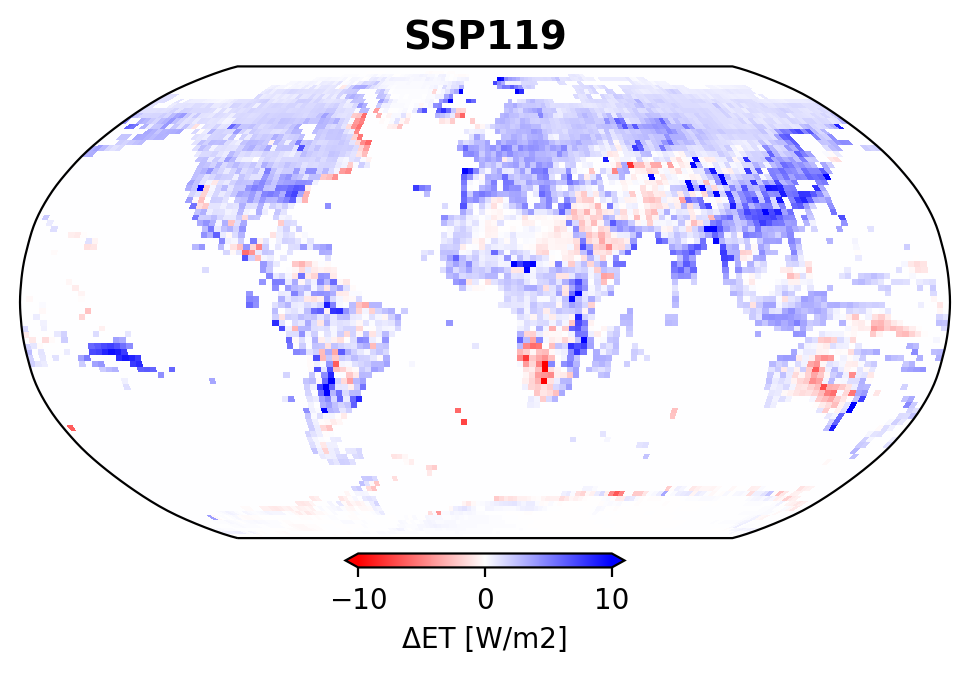

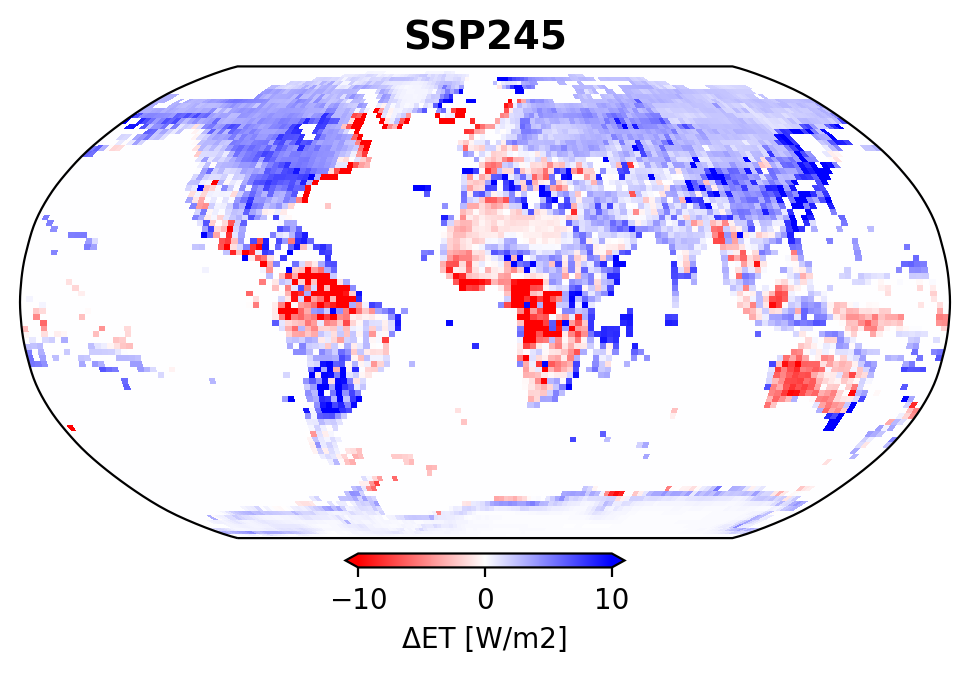

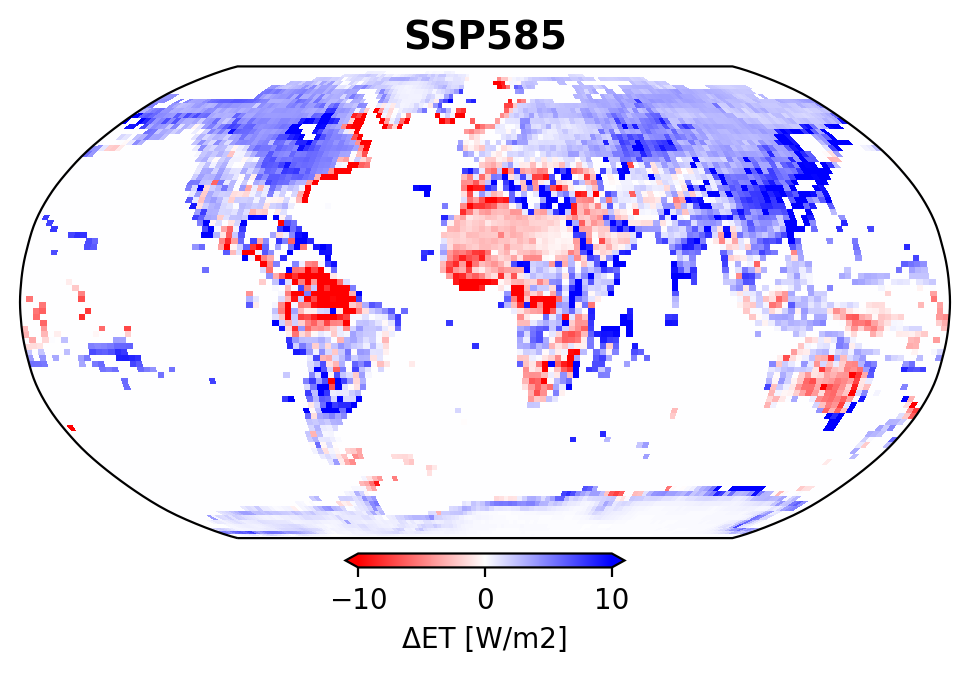

In [143]:
subplot_kws1=dict(projection=ccrs.Robinson(),
                 facecolor='black')
subplot_kws2=dict(projection=ccrs.Mollweide(),
                 facecolor='grey')

ET_diff_ssp119.plot(figsize=(6,5),
                  cmap='bwr_r', 
                  vmin=-10,vmax=10, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394ET [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP119", fontdict={'fontsize': 14, 'fontweight': 'bold'})

ET_diff_ssp245.plot(figsize=(6,5),
                  cmap='bwr_r', 
                  vmin=-10,vmax=10, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394ET [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP245", fontdict={'fontsize': 14, 'fontweight': 'bold'})

ET_diff_ssp585.plot(figsize=(6,5),
                  cmap='bwr_r', 
                  vmin=-10,vmax=10, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394ET [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP585", fontdict={'fontsize': 14, 'fontweight': 'bold'})


Text(0.5, 1.0, 'SSP585')

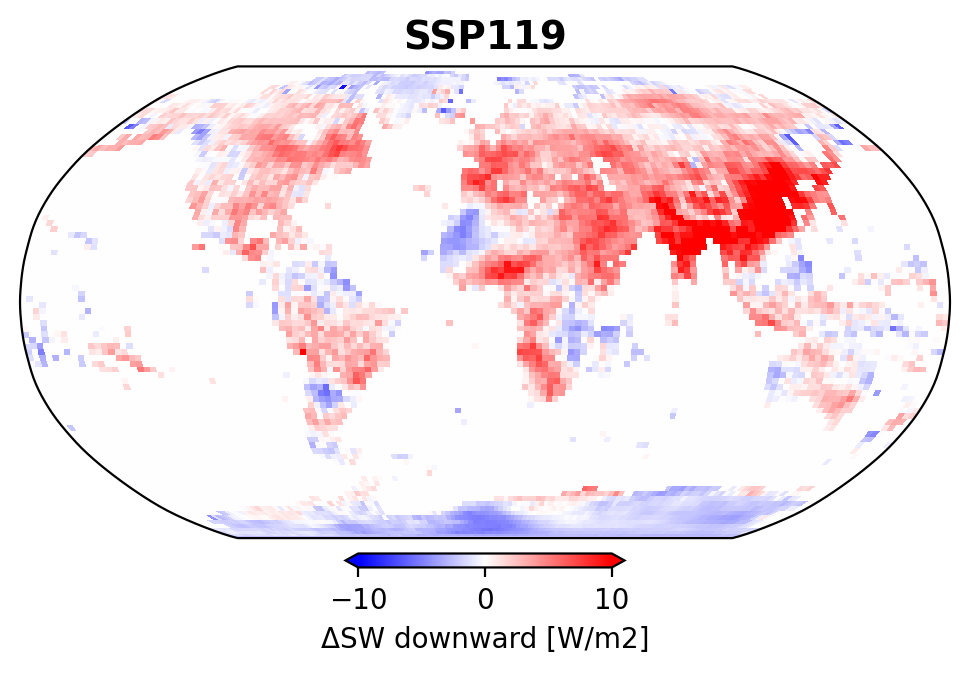

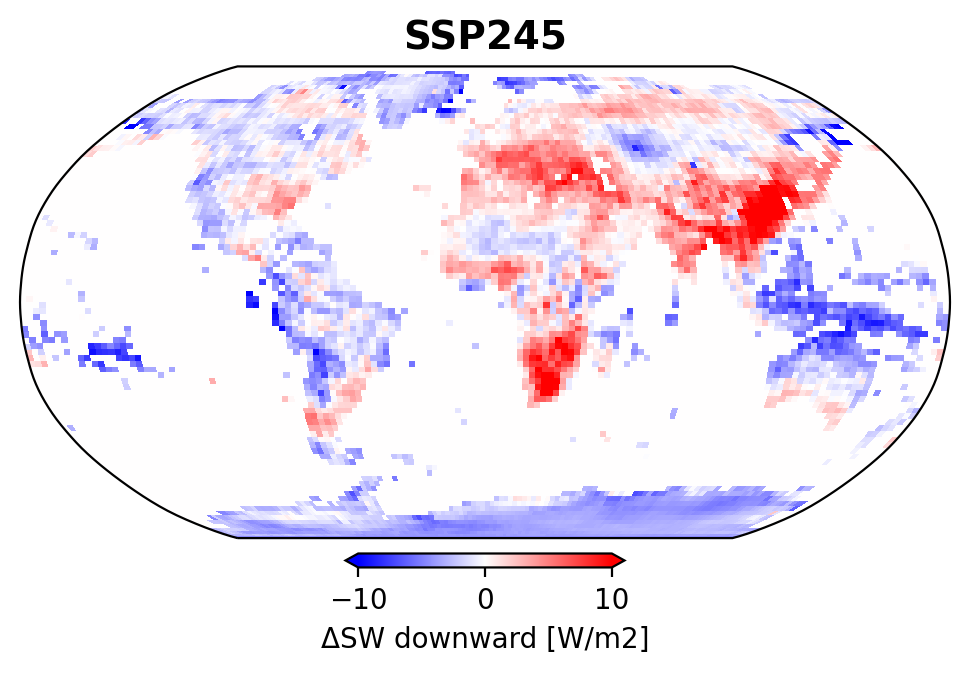

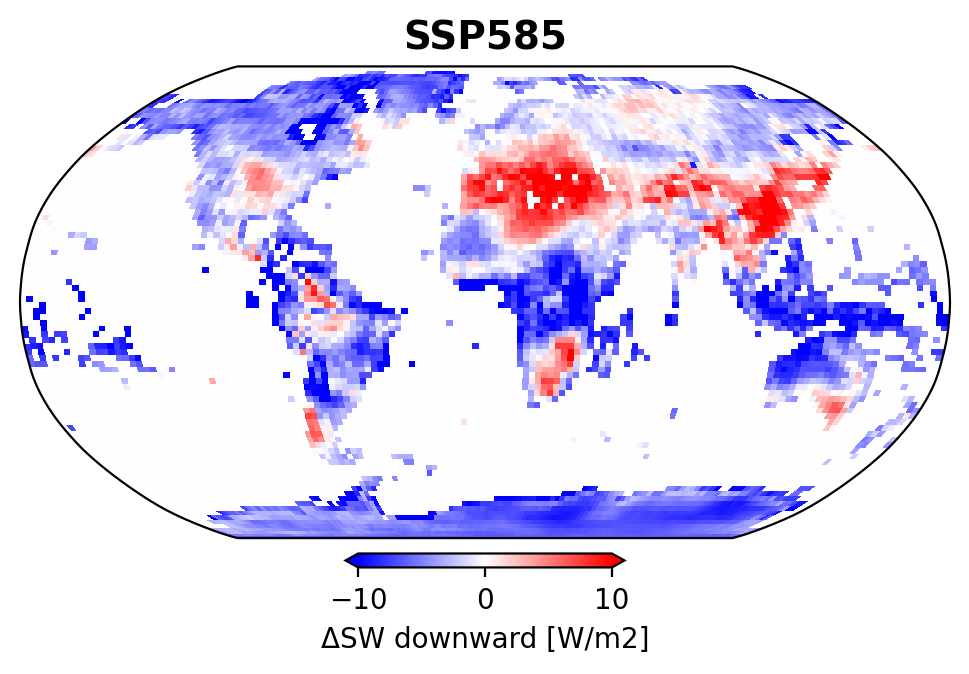

In [140]:
subplot_kws1=dict(projection=ccrs.Robinson(),
                 facecolor='black')
subplot_kws2=dict(projection=ccrs.Mollweide(),
                 facecolor='grey')

SWdown_diff_ssp119.plot(figsize=(6,5),
                  cmap='bwr', 
                  vmin=-10,vmax=10, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394SW downward [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP119", fontdict={'fontsize': 14, 'fontweight': 'bold'})

SWdown_diff_ssp245.plot(figsize=(6,5),
                  cmap='bwr', 
                  vmin=-10,vmax=10, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394SW downward [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP245", fontdict={'fontsize': 14, 'fontweight': 'bold'})

SWdown_diff_ssp585.plot(figsize=(6,5),
                  cmap='bwr', 
                  vmin=-10,vmax=10, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394SW downward [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP585", fontdict={'fontsize': 14, 'fontweight': 'bold'})


Text(0.5, 1.0, 'SSP585')

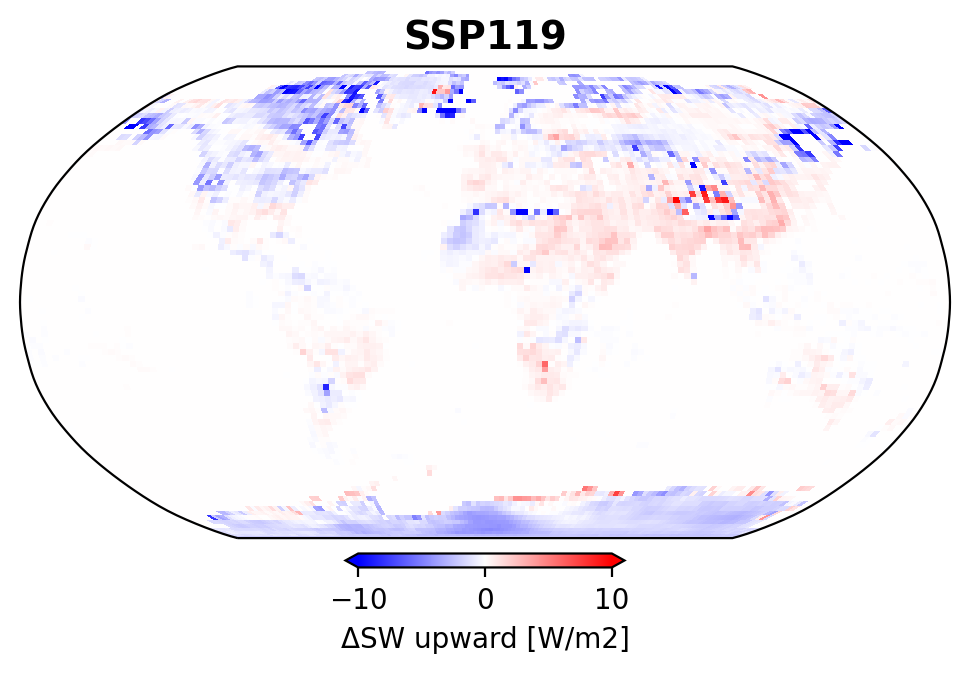

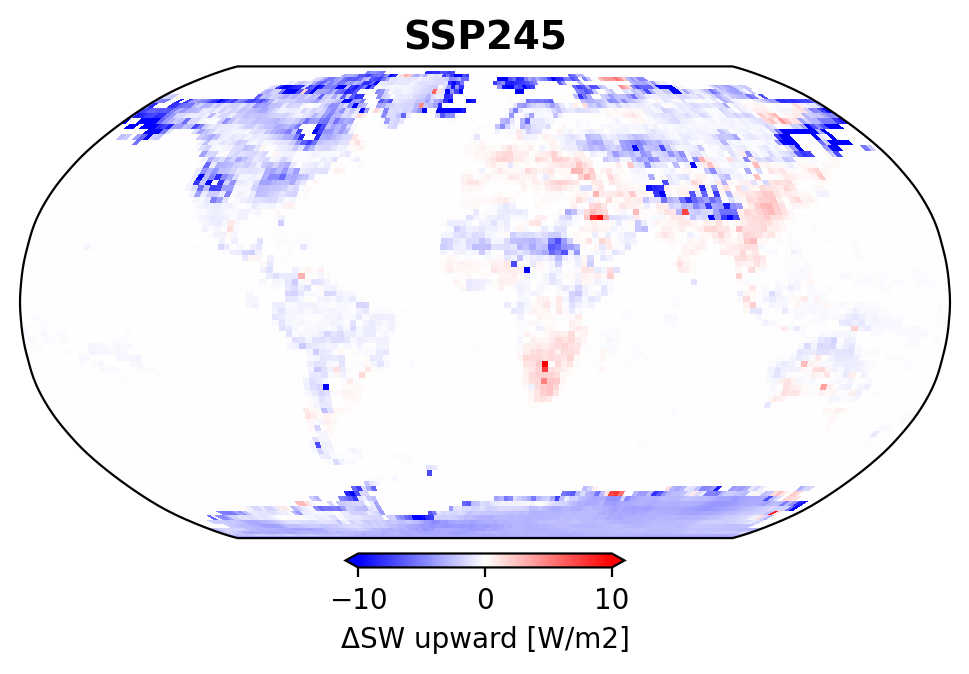

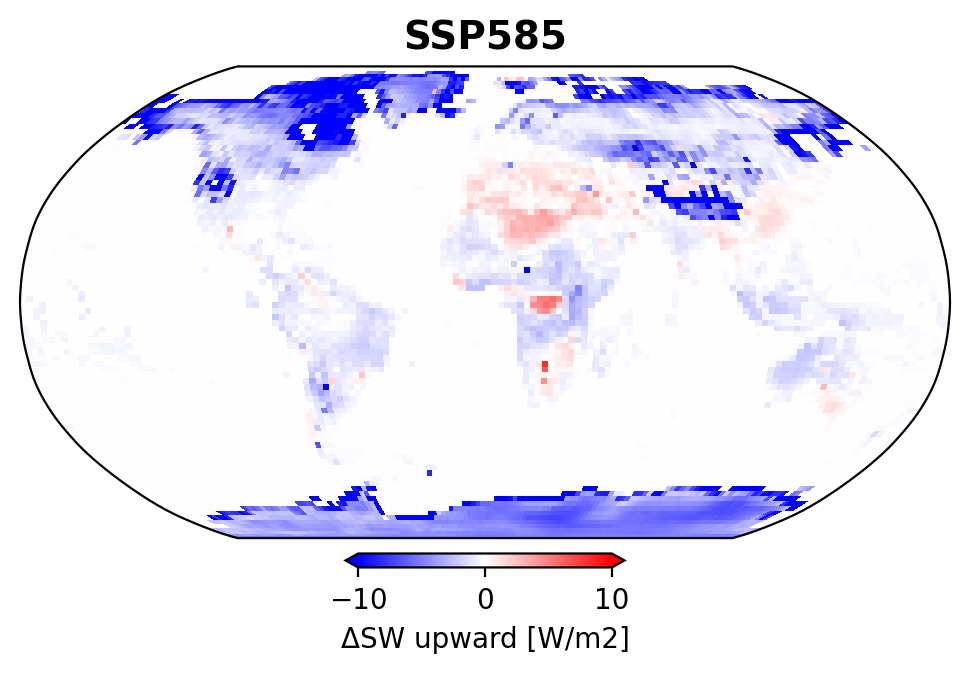

In [141]:
subplot_kws1=dict(projection=ccrs.Robinson(),
                 facecolor='black')
subplot_kws2=dict(projection=ccrs.Mollweide(),
                 facecolor='grey')

SWup_diff_ssp119.plot(figsize=(6,5),
                  cmap='bwr', 
                  vmin=-10,vmax=10, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394SW upward [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP119", fontdict={'fontsize': 14, 'fontweight': 'bold'})

SWup_diff_ssp245.plot(figsize=(6,5),
                  cmap='bwr', 
                  vmin=-10,vmax=10, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394SW upward [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP245", fontdict={'fontsize': 14, 'fontweight': 'bold'})

SWup_diff_ssp585.plot(figsize=(6,5),
                  cmap='bwr', 
                  vmin=-10,vmax=10, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394SW upward [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP585", fontdict={'fontsize': 14, 'fontweight': 'bold'})


Text(0.5, 1.0, 'SSP585')

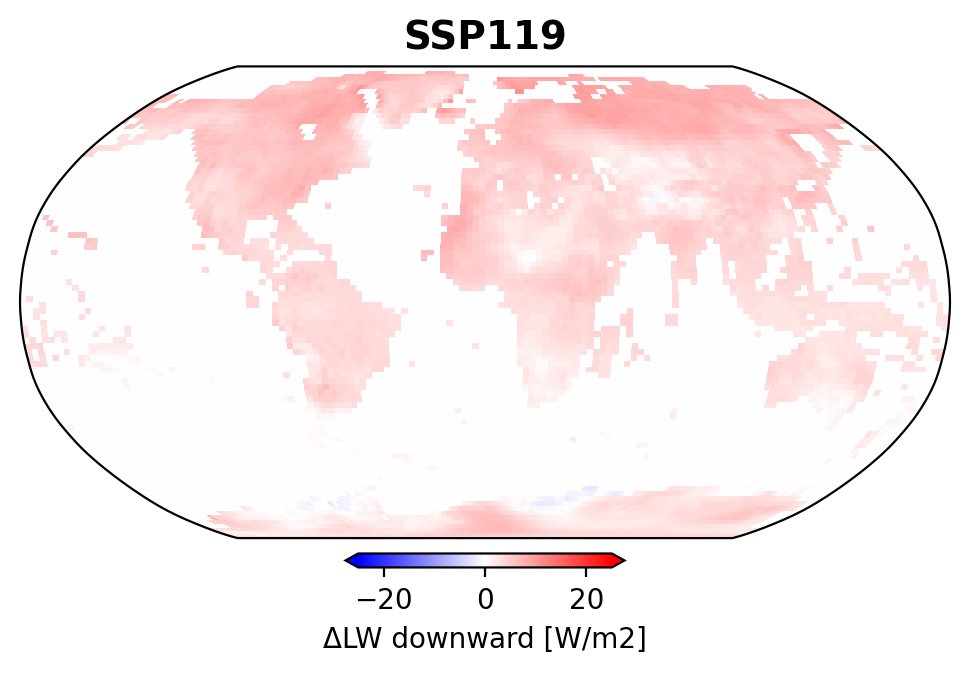

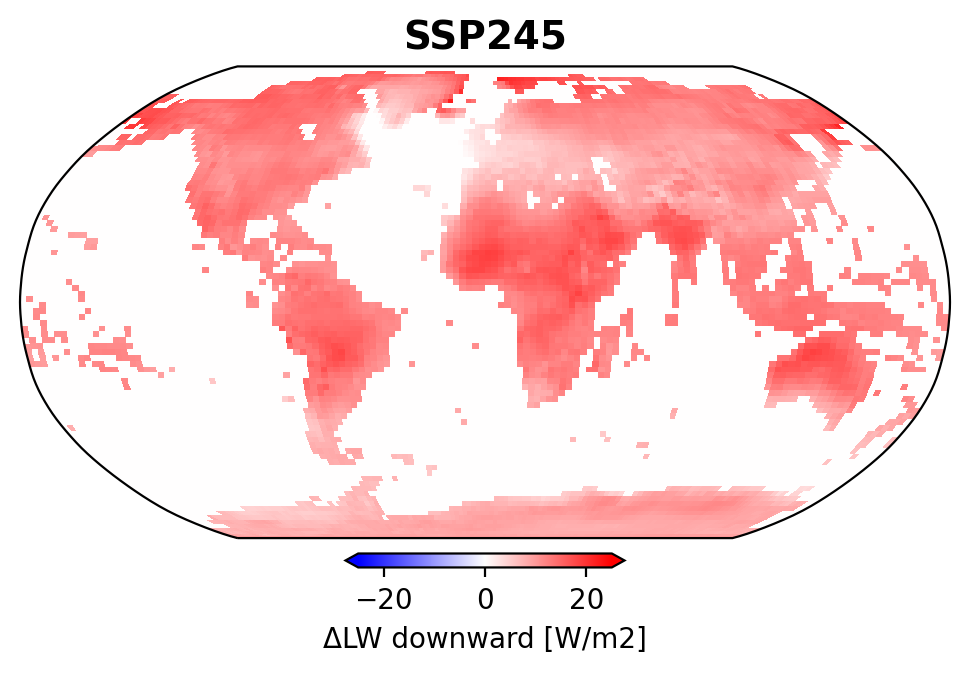

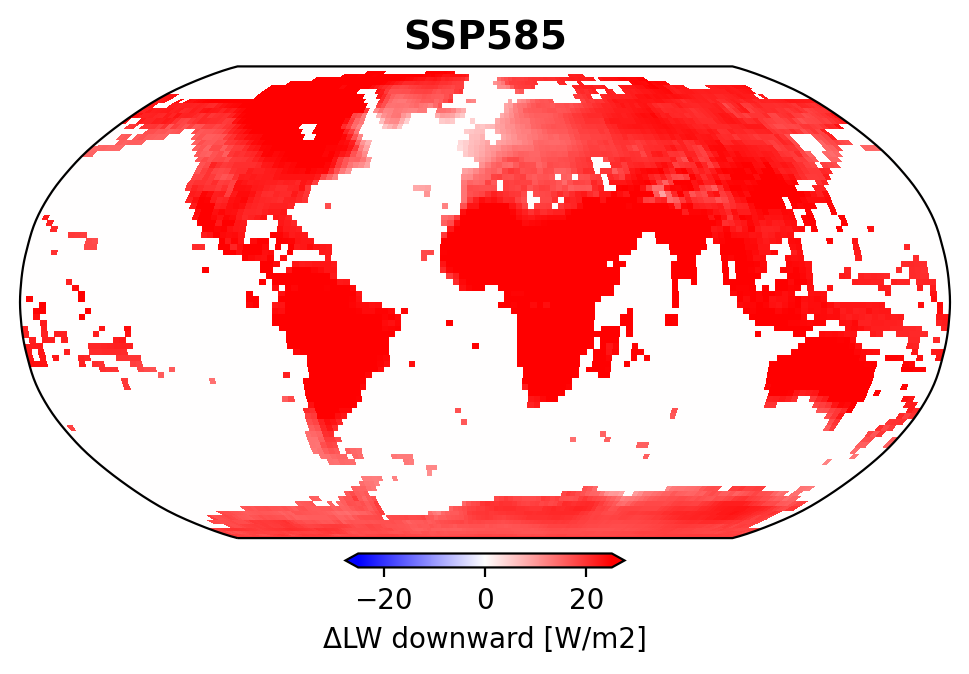

In [139]:
subplot_kws1=dict(projection=ccrs.Robinson(),
                 facecolor='black')
subplot_kws2=dict(projection=ccrs.Mollweide(),
                 facecolor='grey')

LWdown_diff_ssp119.plot(figsize=(6,5),
                  cmap='bwr', 
                  vmin=-25,vmax=25, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394LW downward [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP119", fontdict={'fontsize': 14, 'fontweight': 'bold'})

LWdown_diff_ssp245.plot(figsize=(6,5),
                  cmap='bwr', 
                  vmin=-25,vmax=25, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394LW downward [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP245", fontdict={'fontsize': 14, 'fontweight': 'bold'})

LWdown_diff_ssp585.plot(figsize=(6,5),
                  cmap='bwr', 
                  vmin=-25,vmax=25, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394LW downward [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP585", fontdict={'fontsize': 14, 'fontweight': 'bold'})


Text(0.5, 1.0, 'SSP585')

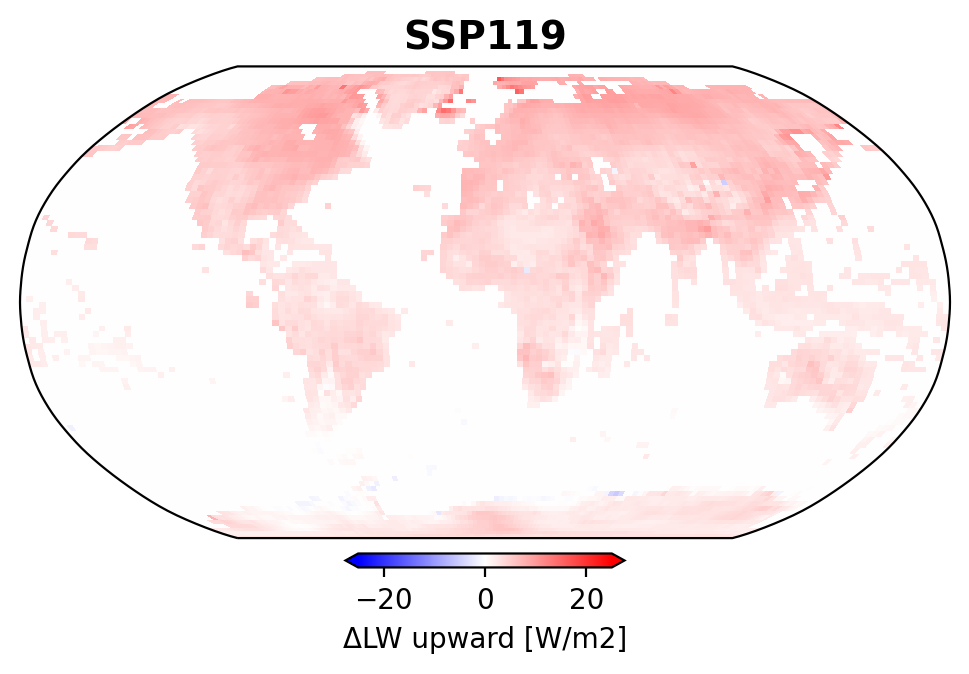

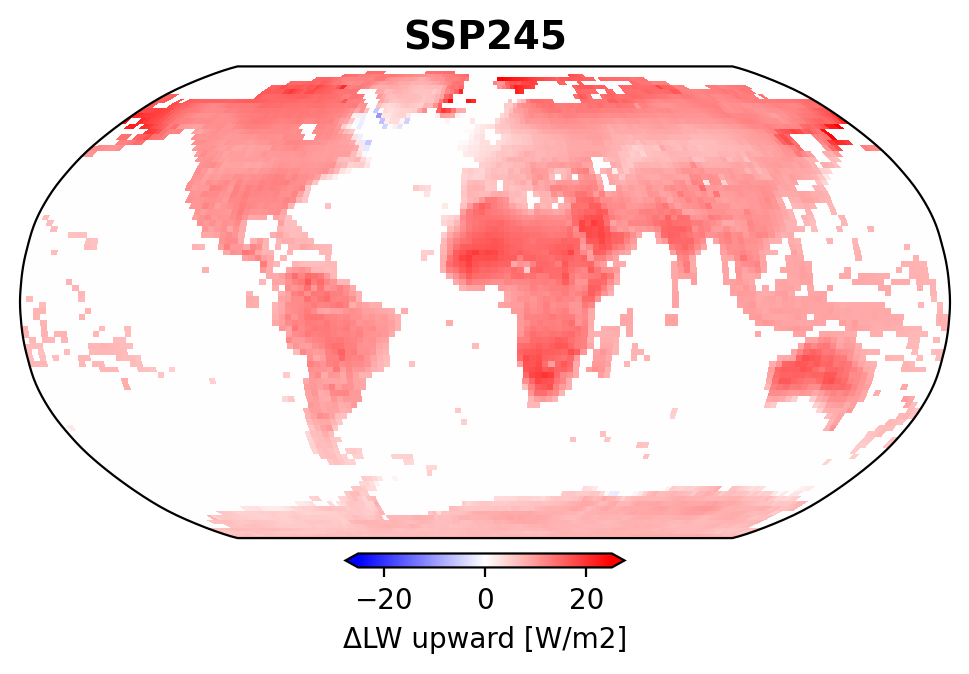

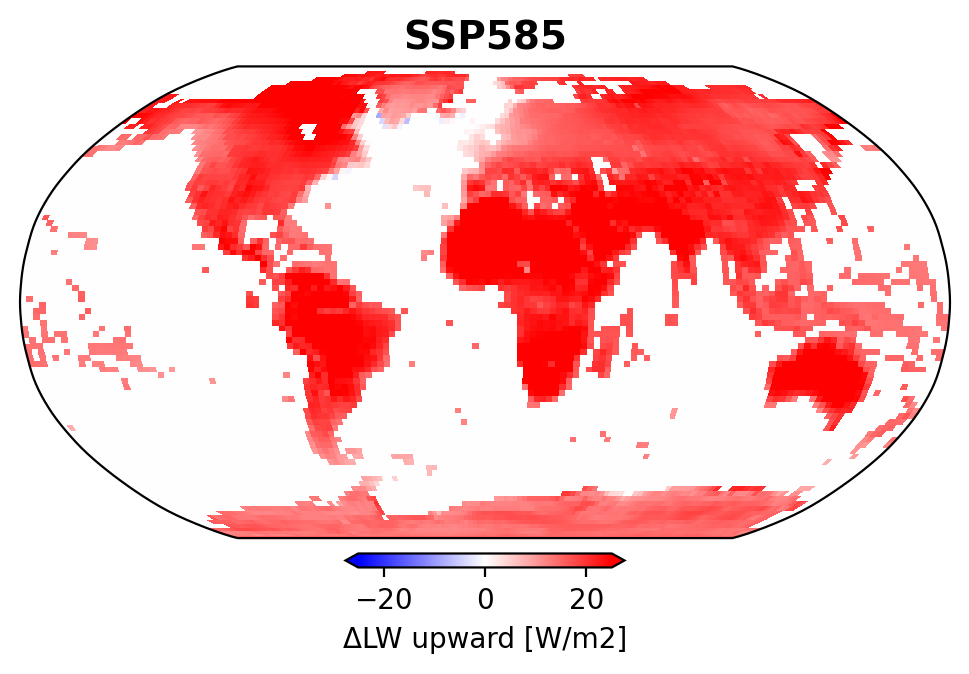

In [138]:
subplot_kws1=dict(projection=ccrs.Robinson(),
                 facecolor='black')
subplot_kws2=dict(projection=ccrs.Mollweide(),
                 facecolor='grey')

LWup_diff_ssp119.plot(figsize=(6,5),
                  cmap='bwr', 
                  vmin=-25,vmax=25, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394LW upward [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP119", fontdict={'fontsize': 14, 'fontweight': 'bold'})

LWup_diff_ssp245.plot(figsize=(6,5),
                  cmap='bwr', 
                  vmin=-25,vmax=25, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394LW upward [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP245", fontdict={'fontsize': 14, 'fontweight': 'bold'})

LWup_diff_ssp585.plot(figsize=(6,5),
                  cmap='bwr', 
                  vmin=-25,vmax=25, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394LW upward [W/m2]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP585", fontdict={'fontsize': 14, 'fontweight': 'bold'})


Text(0.5, 1.0, 'SSP585')

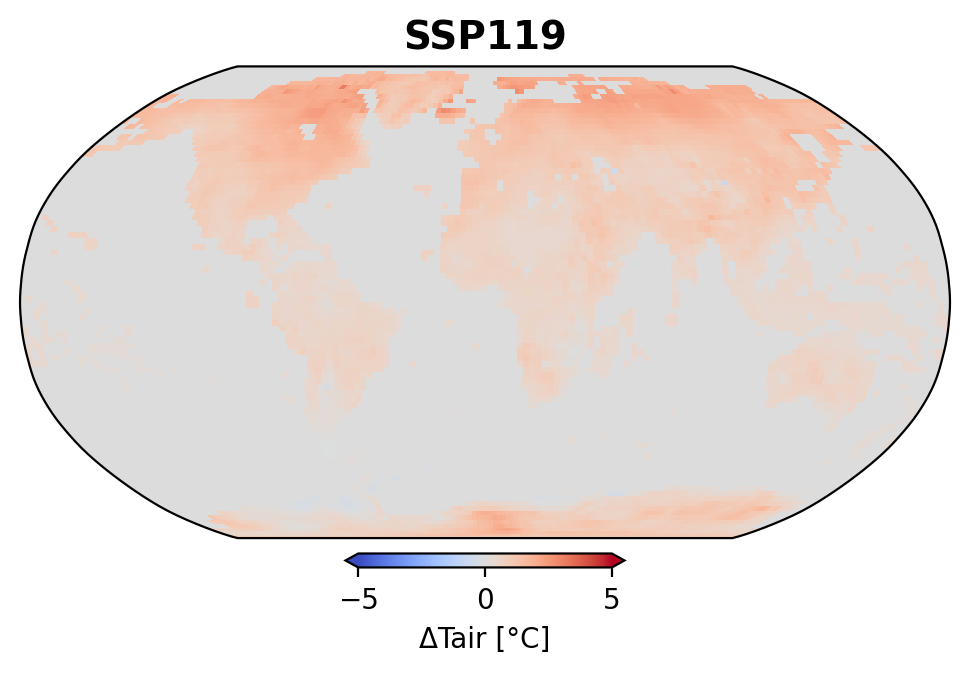

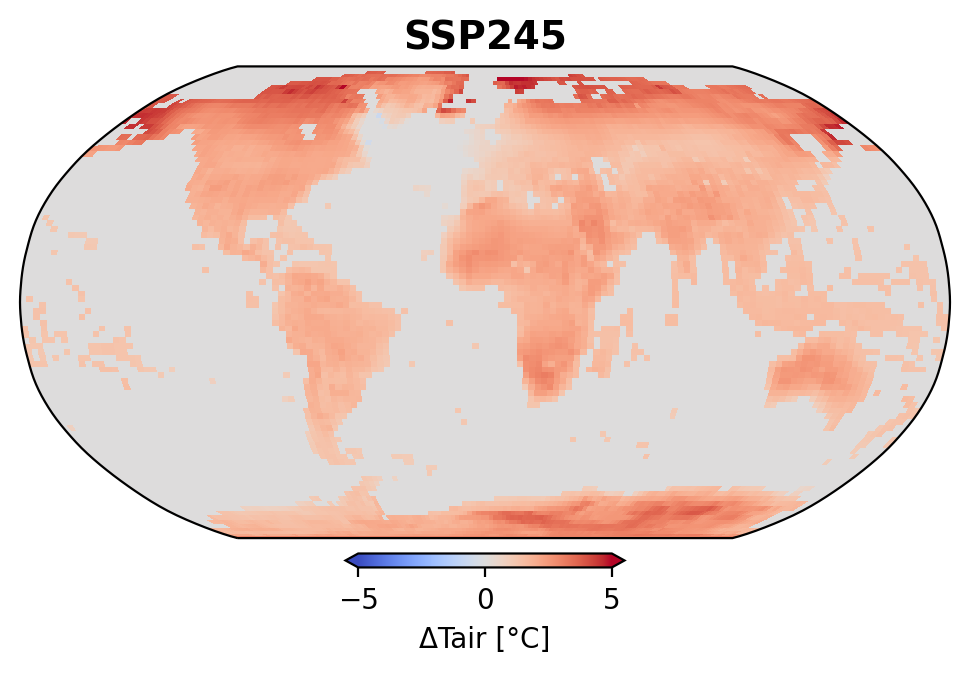

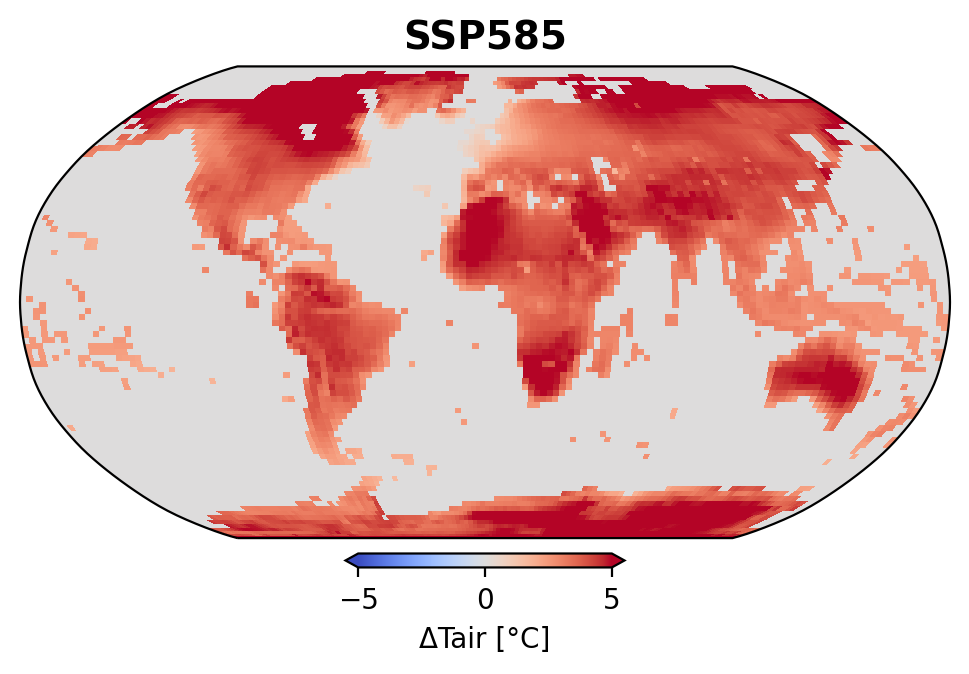

In [145]:
subplot_kws1=dict(projection=ccrs.Robinson(),
                 facecolor='black')
subplot_kws2=dict(projection=ccrs.Mollweide(),
                 facecolor='grey')

Tair_diff_ssp119.plot(figsize=(6,5),
                  cmap='coolwarm', 
                  vmin=-5,vmax=5, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394Tair [\u00b0C]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP119", fontdict={'fontsize': 14, 'fontweight': 'bold'})

Tair_diff_ssp245.plot(figsize=(6,5),
                  cmap='coolwarm', 
                  vmin=-5,vmax=5, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394Tair [\u00b0C]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP245", fontdict={'fontsize': 14, 'fontweight': 'bold'})

Tair_diff_ssp585.plot(figsize=(6,5),
                  cmap='coolwarm', 
                  vmin=-5,vmax=5, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394Tair [\u00b0C]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP585", fontdict={'fontsize': 14, 'fontweight': 'bold'})


Text(0.5, 1.0, 'SSP585')

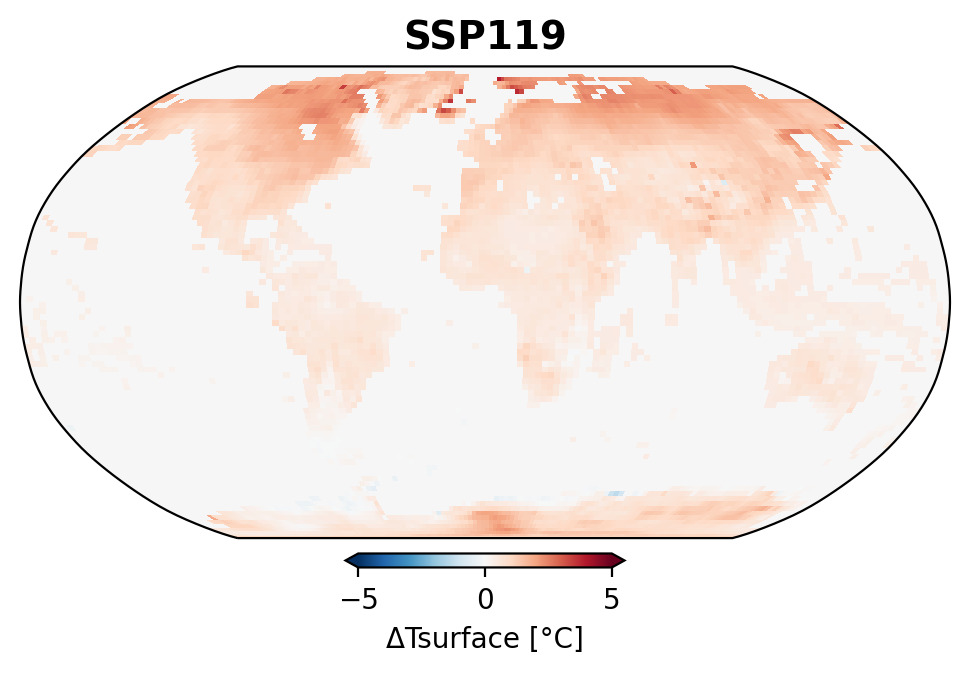

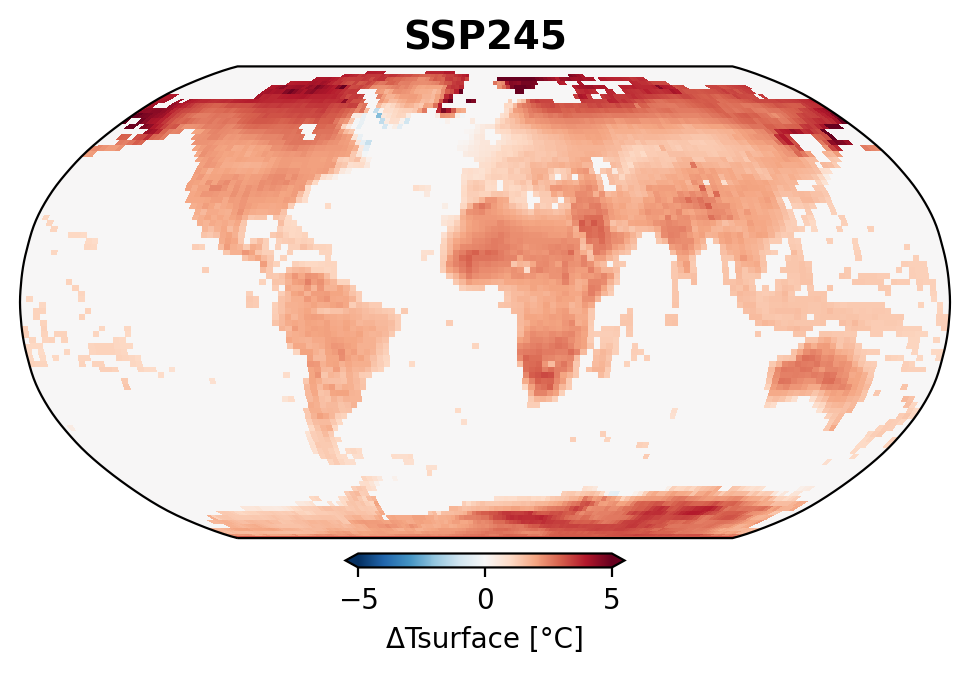

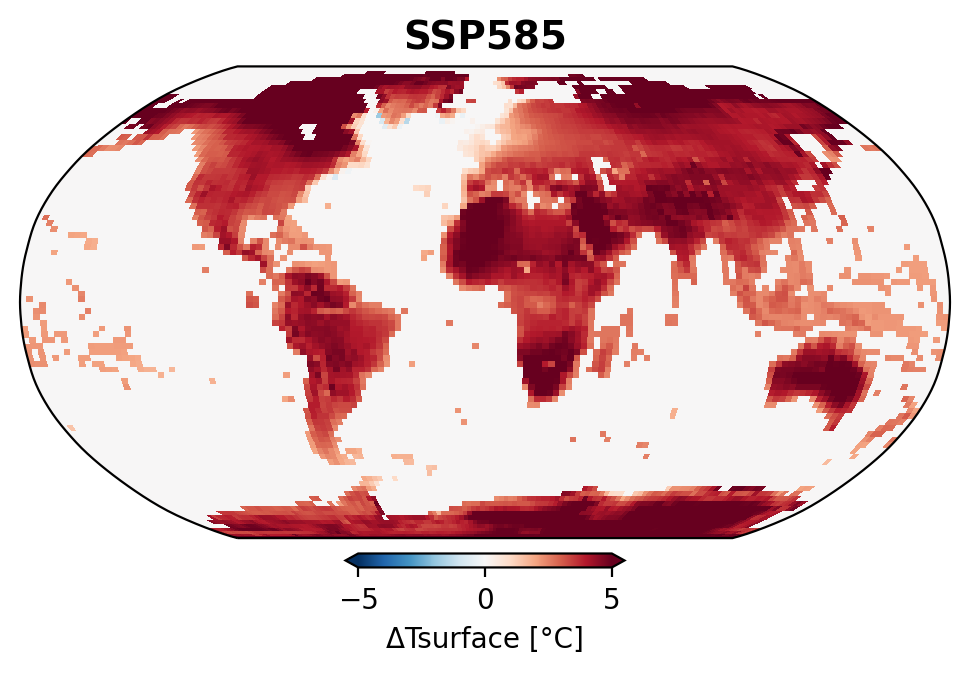

In [146]:
subplot_kws1=dict(projection=ccrs.Robinson(),
                 facecolor='black')
subplot_kws2=dict(projection=ccrs.Mollweide(),
                 facecolor='grey')

Tsurface_diff_ssp119.plot(figsize=(6,5),
                  cmap='RdBu_r', 
                  vmin=-5,vmax=5, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394Tsurface [\u00b0C]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP119", fontdict={'fontsize': 14, 'fontweight': 'bold'})

Tsurface_diff_ssp245.plot(figsize=(6,5),
                  cmap='RdBu_r', 
                  vmin=-5,vmax=5, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394Tsurface [\u00b0C]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP245", fontdict={'fontsize': 14, 'fontweight': 'bold'})

Tsurface_diff_ssp585.plot(figsize=(6,5),
                  cmap='RdBu_r', 
                  vmin=-5,vmax=5, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394Tsurface [\u00b0C]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP585", fontdict={'fontsize': 14, 'fontweight': 'bold'})


Text(0.5, 1.0, 'SSP585')

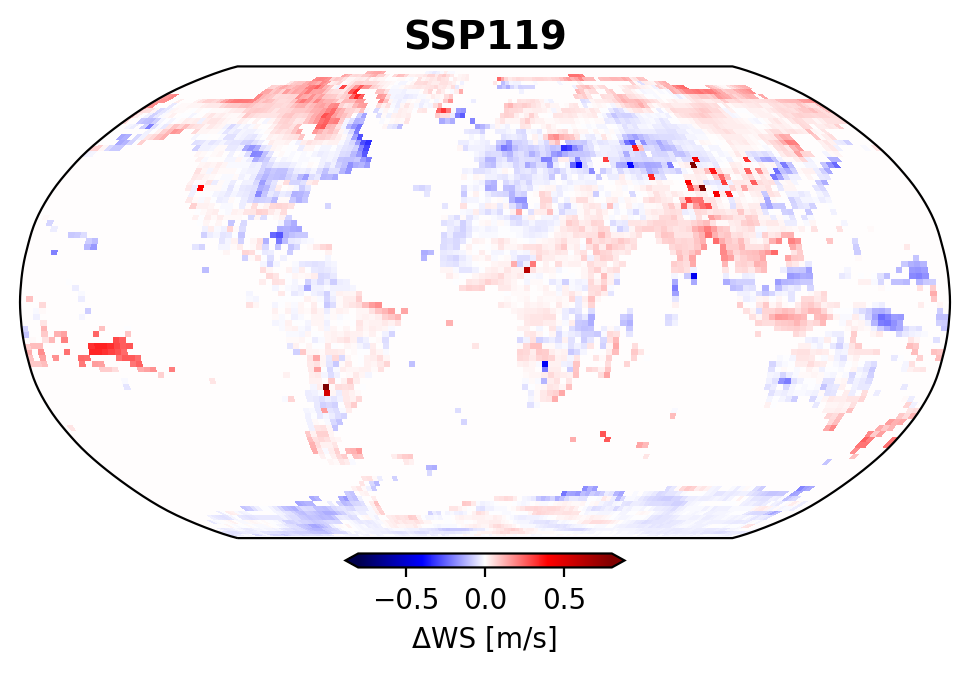

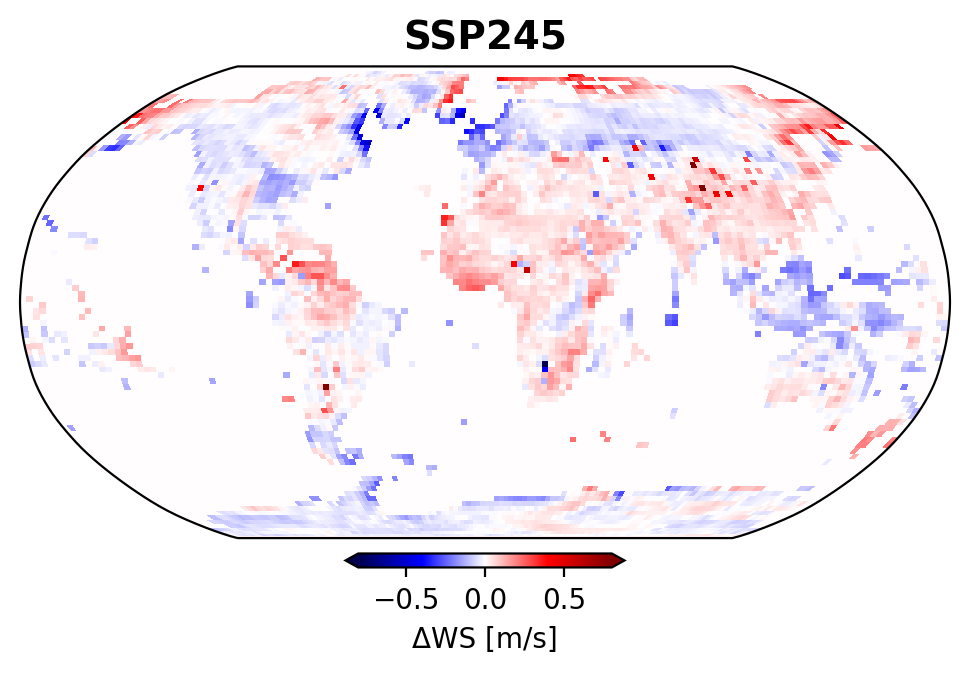

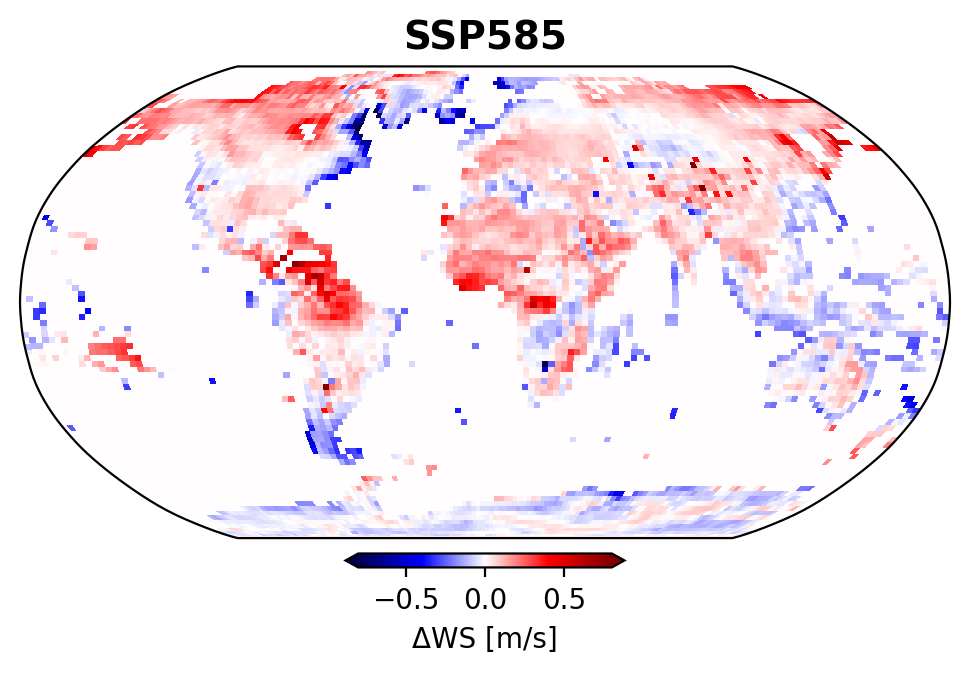

In [135]:
subplot_kws1=dict(projection=ccrs.Robinson(),
                 facecolor='black')
subplot_kws2=dict(projection=ccrs.Mollweide(),
                 facecolor='grey')

WS_diff_ssp119.plot(figsize=(6,5),
                  cmap='seismic', 
                  vmin=-0.8,vmax=0.8, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394WS [m/s]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP119", fontdict={'fontsize': 14, 'fontweight': 'bold'})

WS_diff_ssp245.plot(figsize=(6,5),
                  cmap='seismic', 
                  vmin=-0.8,vmax=0.8, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394WS [m/s]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP245", fontdict={'fontsize': 14, 'fontweight': 'bold'})

WS_diff_ssp585.plot(figsize=(6,5),
                  cmap='seismic', 
                  vmin=-0.8,vmax=0.8, extend='both',
                  subplot_kws = subplot_kws1,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.3, "aspect": 20, "label": "\u0394WS [m/s]", "pad": 0.02}, 
                  robust=True)
plt.title("SSP585", fontdict={'fontsize': 14, 'fontweight': 'bold'})
